여태까지 텐서플로우의 고수준 API를 담당하고 있는 Keras로 신경망을 구현했습니다.  
Keras로 쉽게 모델구성 → 학습 → 평가 → 예측을 하였습니다.  
대부분의 실무 프로젝트를 하는데 Keras로 충분하지만 창의적인 실험과 연구를 하기에는 유연성이 떨어질 수 있습니다.  
나중에 CNN을 블랙박스가 아니라 설명가능한 AI 관점에서 바라볼텐데 이때도 Keras는 약간 부족합니다.  
![](https://drive.google.com/thumbnail?id=1q6OayfjYmiKpEPFU2MXnabroo3vzsWH2&sz=s4000)  

---
텐서플로우는 다음과 같은 계층으로 구성되어 있습니다.  
이번 수업에서는 세번째 계층을 기초 수준에서 다루겠습니다.  
![](https://drive.google.com/thumbnail?id=1XouIjyJEOhOQXg2ztvJZ7Oukhx_CToyT&sz=s4000)  

---
텐서플로우 버전을 확인해 보겠습니다.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


# 텐서

텐서플로우에서는 [tf.constant](https://www.tensorflow.org/api_docs/python/tf/constant)로 텐서를 만듭니다.  
넘파이의 np.array와 비슷합니다.

In [2]:
x = tf.constant([1,2,3])
print(x)

y = tf.constant([[1,2,3],[4,5,6]])
print(y)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


[tf.zeros](https://www.tensorflow.org/api_docs/python/tf/zeros)로 0으로만 이루어진 텐서를 만듭니다.  
넘파이의 np.zeros와 비슷합니다.

In [3]:
x = tf.zeros(3)
print(x)

y = tf.zeros((2,3))
print(y)

tf.Tensor([0. 0. 0.], shape=(3,), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


[tf.ones](https://www.tensorflow.org/api_docs/python/tf/ones)로 1로만 이루어진 텐서를 만듭니다.  
넘파이의 np.ones와 비슷합니다.

In [4]:
x = tf.ones(3)
print(x)

y = tf.ones((2,3))
print(y)

tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


[tf.random.normal](https://www.tensorflow.org/api_docs/python/tf/random/normal)로 정규분포를 따라 랜덤하게 항들을 선택해서 텐서를 만듭니다.  
넘파이의 np.random.randn와 비슷합니다.

In [5]:
x = tf.random.normal((3,))
print(x)

y = tf.random.normal((2,3))
print(y)

tf.Tensor([-0.5686299 -1.0811331 -0.7764604], shape=(3,), dtype=float32)
tf.Tensor(
[[ 0.4144001   0.57224447 -0.31200144]
 [ 0.92026067  0.85512465  0.52172947]], shape=(2, 3), dtype=float32)


[tf.random.uniform](https://www.tensorflow.org/api_docs/python/tf/random/uniform)로 균등분포를 따라 랜덤하게 항들을 선택해서 텐서를 만듭니다.  
넘파이의 np.random.rand와 비슷합니다.

In [6]:
x = tf.random.uniform((3,))
print(x)

y = tf.random.uniform((2,3))
print(y)

tf.Tensor([0.59623647 0.7539538  0.4192052 ], shape=(3,), dtype=float32)
tf.Tensor(
[[0.30444145 0.7389327  0.31308842]
 [0.6864797  0.07475996 0.8320389 ]], shape=(2, 3), dtype=float32)


넘파이에서는 np.dot, np.matmul, @ 세가지 방식으로 행렬 곱하기를 합니다.  
텐서플로우에서는 tf.matmul, @ 두가지 방식으로 행렬을 곱할 수 있습니다.

In [7]:
x = tf.constant([[1,2],[3,4]])
y = tf.constant([[5,6],[7,8]])
z = tf.matmul(x,y)
print(z)
print(x@y)

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


# 변수 텐서

딥러닝 학습의 핵심은 역전파입니다.  
역전파는 손실함수를 파라미터들로 효율적으로 미분하는 방법입니다.  
미분은 수학적으로 로컬(local)한 개념입니다.  
미분계수 공식
$$
f'(a) = \lim_{h \to 0} {f(a+h) - f(a) \over h}
$$
을 보면 $x=a$의 함수값 뿐만 아니라 주의의 함수값들도 함께 미분계수를 결정합니다.  
실제로 미분계수를 계산할때 미분 먼저하고 점을 대입합니다.  
따라서, 텐서플로우는 미분을 하려면 어떤 텐서가 고정된 상수인지 어떤 텐서가 변수인데 현재 특정값을 가질뿐인지 알고 있어야 합니다.  
[tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable)로 변수 텐서를 만듭니다.

In [8]:
x = tf.Variable([1.,2.,3.])
print(x)

y = tf.Variable([[1.,2.],[3.,4.]])
print(y)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>


[assign](https://www.tensorflow.org/api_docs/python/tf/Variable#assign) 메서드로 엔트리 값을 새로 할당합니다.  
넘파이로 치면 x[0]=4, y[0,0]=5입니다.

In [9]:
x[0].assign(4.)
print(x)

y[0,0].assign(5.)
print(y)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([4., 2., 3.], dtype=float32)>


<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[5., 2.],
       [3., 4.]], dtype=float32)>


[assign_add](https://www.tensorflow.org/api_docs/python/tf/Variable#assign_add) 메서드와 [assign_sub](https://www.tensorflow.org/api_docs/python/tf/Variable#assign_sub) 메서드를 이용해 덧셈과 뺄셈으로 값을 새로 할당합니다.  
넘파이로 치면 x+=y와 x-=y입니다.  
tf.Variable은 변경이 가능하지만 tf.constant는 변경 불가능한 객체라는 점 주의하세요.

In [10]:
x = tf.Variable([1.,2.,3.])
y = tf.Variable([4.,5.,6.])

x.assign_add(y)
print(x)

x.assign_sub(y)
print(x)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([5., 7., 9.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>


# 자동 미분

텐서플로우에서는 [tf.GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape)를 이용하여 해석적(analytic)으로 미분을 합니다.  
딥러닝I에서 우리는 신경망의 학습을 처음에는 수치미분으로 구현했다가 너무 느려서 공식으로 각층을 직접 미분한 후에 연쇄법칙으로 묶었습니다.  
수치미분은 평균변화율에 의한 근사이고 해석적 미분은 공식을 통한 미분입니다.  
$x=1$에서 함수 $y=x^2$의 미분계수를 tf.GradientTape로 구해보겠습니다.  
먼저 tf.Variable로 변수 텐서를 만듭니다.  
with문 안에 함수식을 써주고 [gradient](https://www.tensorflow.org/api_docs/python/tf/GradientTape#gradient) 메서드안에 함수값과 변수를 순서대로 써줍니다.  
손으로 계산해보면 함수 $y=x^2$의 도함수는 $y'=2x$이므로 $x=1$에서의 미분계수는 $2$니까 일치합니다.

In [11]:
x = tf.Variable(1.)
with tf.GradientTape() as tape:
    y = x**2
gradient = tape.gradient(y, x)
print(gradient)

tf.Tensor(2.0, shape=(), dtype=float32)


$x=1$에서 함수 $y=x^3$의 미분계수를 tf.GradientTape로 구했습니다.  
손으로 계산해보면 함수 $y=x^3$의 도함수는 $y'=3x^2$이므로 $x=1$에서의 미분계수는 $3$이니까 일치합니다.  
$y=x^2$과 $y=x^3$의 $x=1$에서의함수값은 모두 $1$입니다.  
하지만 $x=1$ 주변의 함수값은 다릅니다.
예를 들어, $1.1^2 = 1.21$이고 $1.1^3 = 1.331$입니다.  
미분계수는 주변값들이 결정합니다.  
그래서 미분 변수가 되는 텐서는 tf.Variable로 생성해야 합니다.

In [12]:
x = tf.Variable(1.) 
with tf.GradientTape() as tape: 
    y = x**3 
gradient = tape.gradient(y, x) 
print(gradient) 

tf.Tensor(3.0, shape=(), dtype=float32)


상수 텐서로 생성하면 미분을 계산할 수 없습니다.

In [13]:
x = tf.constant(1.)
with tf.GradientTape() as tape:
    y = x**2
gradient = tape.gradient(y, x)
print(gradient)

None


하지만, [watch](https://www.tensorflow.org/api_docs/python/tf/GradientTape#watch) 메서드를 쓰면 가능합니다.

In [14]:
x = tf.constant(1.)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**2
gradient = tape.gradient(y, x)
print(gradient)

tf.Tensor(2.0, shape=(), dtype=float32)


합성함수의 미분도 가능합니다.  
$y=2x+1$이고 $z=y^2$일 때, 미분계수 ${dz \over dx}\big|_{x=1}$를 tf.GradientTape 구해보죠.  
with문 안에 합성하는 함수의 식을 차례대로 써줍니다.  
gradient 메서드안에 함수값과 변수를 차례로 써줍니다.  
손으로 계산하면 ${dy \over dx}=2$, ${dz \over dy}=2y$, $y(1)=3$이므로 합성함수의 미분법에 의해
$$
{dz \over dx}\big|_{x=1} = {dz \over dy}\big|_{y=3} \times {dy \over dx}\big|_{x=1} = 6 \times 2 = 12
$$
이니까 일치합니다.

In [15]:
x = tf.Variable(1.)
with tf.GradientTape() as tape:
    y = 2*x+1
    z = y**2
gradient = tape.gradient(z, x)
print(gradient)

tf.Tensor(12.0, shape=(), dtype=float32)


합성하면 $z=(2x+1)^2$입니다.  
with문안에 합성한 식을 써줘도 됩니다.  
손으로 계산하면 $z'=2(2x+1) \times 2$이므로 미분계수는 $2\times(2\times1+1)\times2=12$이니까 일치합니다.

In [16]:
x = tf.Variable(1.)
with tf.GradientTape() as tape:
    z = (2*x+1)**2
gradient = tape.gradient(z, x)
print(gradient)

tf.Tensor(12.0, shape=(), dtype=float32)


**[실습1] (10분) (i) $y=2x, z=\sin y, w= z^2$일때 미분계수 ${dw \over dx}\big|_{x={\pi \over8}}$를 GradientTape로 구하시오. 손으로 계산한 결과와 비교하시오. (힌트 : math.pi, tf.math.sin)**

In [17]:
import math 
import tensorflow as tf 

x= tf.Variable(math.pi/8) 
with tf.GradientTape() as tape: 
    y= 2*x
    z= tf.math.sin(y) 
    w= z**2

# dw/dx 계산
tape.gradient(w, x)

<tf.Tensor: shape=(), dtype=float32, numpy=1.9999999>

**(ii) 합성한 후 미분계수 ${dw \over dx}\big|_{x={\pi \over8}}$를 GradientTape로 구하시오. 손으로 계산한 결과와 비교하시오.**

tf.GradientTape로 다변수 미분을 해보겠습니다.  
스튜어트 미적분학책 연습문제입니다 : 점 $(1,-1,3)$에서 함수 $f(x,y,z) = xy + yz +zx$의 그레디언트를 구하시오.  
세 변수를 모두 tf.Variable로 생성합니다.  
with문안에 함수식을 써줍니다.  
gradint메서드에 앞에는 함수값을 뒤에는 세 변수를 리스트로 묶어서 입력합니다.  
손으로 계산하면 $\nabla f(x,y,z) = (y+z, x+z, y+x)$이므로 $\nabla f(1,-1,3) = (2,4,0)$이니까 일치합니다.

In [18]:
x = tf.Variable(1.)
y = tf.Variable(-1.)
z = tf.Variable(3.)
with tf.GradientTape() as tape:
    w = x*y + y*z + z*x
gradient = tape.gradient(w, [x,y,z])
print(gradient)

[<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, <tf.Tensor: shape=(), dtype=float32, numpy=4.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>]


**[실습2] (5분) 점 $(3,1)$에서 함수 $f(x,y)=\log(x-2y)$의 그레디언트를 GradientTape로 구하시오. 손으로 계산한 결과와 비교하시오. (힌트 : tf.math.log)**

In [19]:
x= tf.Variable(3. ) 
y= tf.Variable(1. ) 
with tf.GradientTape() as tape: 
    z= tf.math.log(x-2*y) 
gradient= tape.gradient(z, [x, y])
print(gradient)

[<tf.Tensor: shape=(), dtype=float32, numpy=1.0>, <tf.Tensor: shape=(), dtype=float32, numpy=-2.0>]


# 선형 분류기 (linear classifier)

연습삼아 저수준 API로 매우 간단한 신경망을 만들고 학습시켜 보겠습니다.  
먼저 다변량 정규분포를 따라 2차원 데이터를 각각 1,000개씩 두 세트를 만듭니다.  
cov는 공분산 행렬입니다.

In [20]:
import numpy as np

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

print(negative_samples.shape)
print(positive_samples.shape)

(1000, 2)
(1000, 2)


두 데이터셋을 세로로 이어 붙이겠습니다.

In [21]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs.shape)

(2000, 2)


두 데이터셋의 라벨을 각각 0과 1로 잡고 세로로 쌓아올립니다.

In [22]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets.shape)
print(targets)

(2000, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


두 데이터 셋의 산포도를 그려보겠습니다.  
노란색 군집이 라벨이 1입니다.

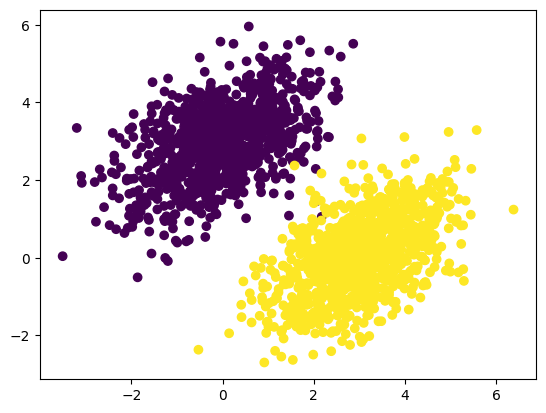

In [23]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

입력데이터는 2차원이고 라벨은 1차원입니다.  
은닉층 없이 그림과 같은 간단한 신경망을 만들겠습니다.  
딥러닝 첫 수업에서 본 퍼셉트론입니다.  
데이터셋을 $(0,0), (1,0), (0,1), (1,1)$로 잡으면 AND게이트, NAND 게이트, OR 게이트 문제입니다.  
그때는 기하학적 관찰을 통해 네 점을 직선으로 분리하는 문제로 바꿈으로써 가중치와 편향을 직접 찾아냈었습니다.  
지금은 직접 찾지 않고 위 데이터로부터 신경망이 학습하도록 하겠습니다.  
그러기 위해서는 손실함수를 미분해야 하는데 손실함수의 변수가 가중치와 편향입니다.  
따라서, 가중치와 편향을 tf.Variable로 정의해야 합니다.  
![](https://drive.google.com/thumbnail?id=1QjQ10bZsxQoIbCsdjFdP7dBr-jdapsQN&sz=s4000)

In [24]:
W = tf.Variable(tf.random.uniform((2, 1)))
b = tf.Variable(tf.zeros(1))

print(f"가중치 : {W}")
print(f"편향 : {b}")

가중치 : <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.09983313],
       [0.81580126]], dtype=float32)>
편향 : <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


신경망은 Affine변환 하나만으로 이루어져 있습니다.  
수식으로 쓰면
$$
y = (x_1,x_2) \begin{pmatrix} w_1 \\ w_2 \end{pmatrix} +b = w_1 x_1 + w_2 x_2 +b
$$
입니다.

In [25]:
def model(inputs):
    return tf.matmul(inputs, W) + b

손실함수로 평균제곱오차를 사용합니다.  
$(t_1,t_2,\cdots,t_{2000})=(0,0,\cdots,0,1,1,\cdots,1)$을 라벨이라 하겠습니다.  
먼저 $((t_1-y_1)^2, (t_2-y_2)^2, \cdots, (t_{2000}-y_{2000})^2)$을 구한 후 [tf.reduce_mean](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean)으로 평균을 합니다.

In [26]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

with문안에 미분하려는 손실함수의 정의를 써줍니다.  
gradient 메서드에 함수값 loss와 미분하려는 변수 [W, b]를 써줍니다.  
with문안에는 미분하려는 변수가 포함되어야 합니다.  
만일 loss = square_loss(targets, predictions)만 쓰면
$$
{\rm loss} = {1 \over 2000}\sum_{n=1}^{2000} (t_n-y_n)^2
$$
입니다.  
$w_1,w_2,b$를 포함하지 않는 수식이어서 텐서플로우가 미분을 할 수 없습니다.  
predictions = model(inputs)까지 써줘야
$$
{\rm loss} = {1 \over 2000}\sum_{n=1}^{2000} \left(t_n-(w_1 x^n_1 + w_2 x^n_2 + b)\right)^2
$$
이되서 텐서플로우가 $w_1,w_2,b$에 대해서 미분할 수 있습니다.  
assign_sub부분을 수식으로 쓰면 경사하강법
$$
W \leftarrow W - \eta {\partial L \over \partial W}, \qquad b \leftarrow b - \eta {\partial L \over \partial b}
$$
입니다.

In [27]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

역전파 코드를 작성하지 않아도 자동미분을 통해 학습합니다.

In [28]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 3.8816
1번째 스텝의 손실: 0.2641
2번째 스텝의 손실: 0.1334
3번째 스텝의 손실: 0.1112
4번째 스텝의 손실: 0.1021
5번째 스텝의 손실: 0.0951
6번째 스텝의 손실: 0.0889
7번째 스텝의 손실: 0.0833
8번째 스텝의 손실: 0.0781
9번째 스텝의 손실: 0.0734
10번째 스텝의 손실: 0.0692
11번째 스텝의 손실: 0.0653
12번째 스텝의 손실: 0.0617
13번째 스텝의 손실: 0.0585
14번째 스텝의 손실: 0.0555
15번째 스텝의 손실: 0.0528
16번째 스텝의 손실: 0.0503
17번째 스텝의 손실: 0.0481
18번째 스텝의 손실: 0.0460
19번째 스텝의 손실: 0.0442
20번째 스텝의 손실: 0.0425
21번째 스텝의 손실: 0.0409
22번째 스텝의 손실: 0.0395
23번째 스텝의 손실: 0.0382
24번째 스텝의 손실: 0.0370
25번째 스텝의 손실: 0.0359
26번째 스텝의 손실: 0.0349
27번째 스텝의 손실: 0.0340
28번째 스텝의 손실: 0.0332
29번째 스텝의 손실: 0.0325
30번째 스텝의 손실: 0.0318
31번째 스텝의 손실: 0.0312
32번째 스텝의 손실: 0.0306
33번째 스텝의 손실: 0.0301
34번째 스텝의 손실: 0.0296
35번째 스텝의 손실: 0.0292
36번째 스텝의 손실: 0.0288
37번째 스텝의 손실: 0.0285
38번째 스텝의 손실: 0.0281
39번째 스텝의 손실: 0.0278


훈련데이터에 대해서 예측해보겠습니다.  
신경망은 선형함수 $y=w_1x_1+w_2x_2+b$이기 때문에 임의의 실수값을 취합니다.  
함수값이 1에 더 가까우면 라벨 1로 예측한 거고 함수값이 0에 더 가까우면 라벨 0으로 예측한 겁니다.  
1과 0의 중간인 0.5가 임계값이 됩니다.  
노란색 군집이 신경망이 라벨1로 예측한 데이터들입니다.

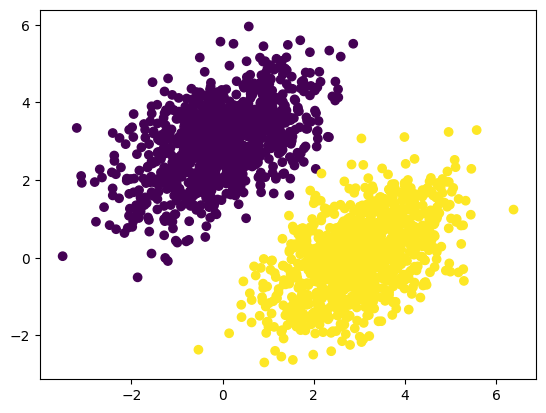

In [29]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

데이터 $(x_1,x_2)$를 입력했을 때 신경망의 예측값 $w_1x_1+w_2x_2+b$이 0.5를 넘으면 1로 예측하고 0.5를 넘지 않으면 0으로 예측합니다.  
$w_1x_1+w_2x_2+b = 0.5$가 임계선입니다.  
표준형으로 쓰면
$$
x_2 = -{w_1 \over w_2}x_1 + {0.5-b \over w_2}
$$
입니다.  
딥러닝I 첫번째 수업에서는 4개의 점 $(0,0), (1,0), (0,1), (1,1)$을 직선으로 분리한 후에 계수로부터 가중치와 편향을 찾아냈었습니다.  
여기서는 데이터를 통한 학습으로부터 가중치와 편향을 찾아낸 후 직선을 그립니다.

가중치 벡터 : <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.17765196],
       [-0.12462915]], dtype=float32)>
편향 : <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.40111023], dtype=float32)>


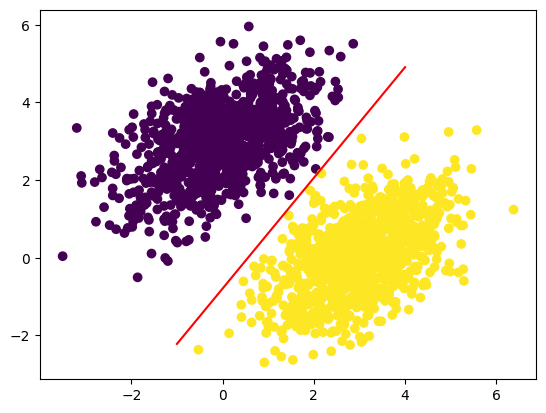

In [30]:
print(f"가중치 벡터 : {W}")
print(f"편향 : {b}")

x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

**[과제1] 스텝이 5의 배수가 될때마다 예측 산포도와 임계 직선을 2$\times$4 모아찍기로 차례대로 출력하시오.**

In [48]:
W = tf.Variable(tf.random.uniform((2, 1)))
b = tf.Variable(tf.zeros(1))

print(f"가중치 : {W}")
print(f"편향 : {b}")

가중치 : <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.5607892 ],
       [0.21087623]], dtype=float32)>
편향 : <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [49]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)

    return loss

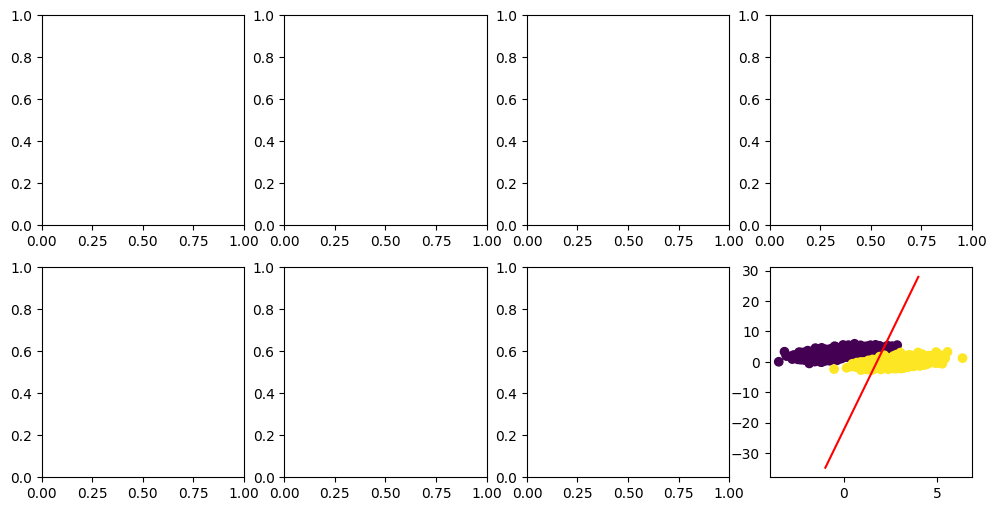

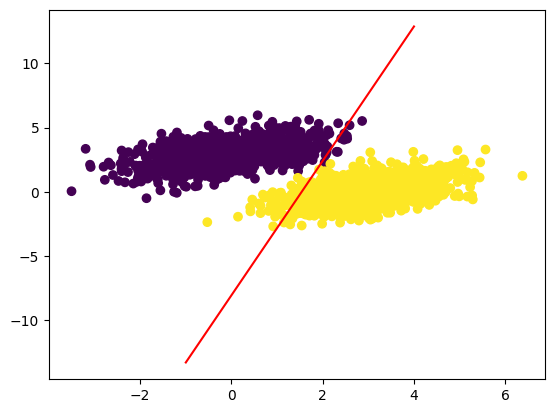

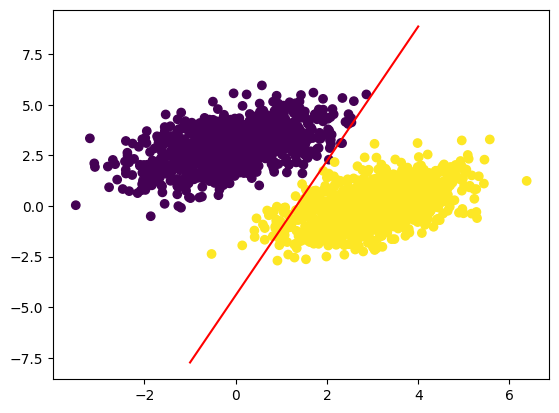

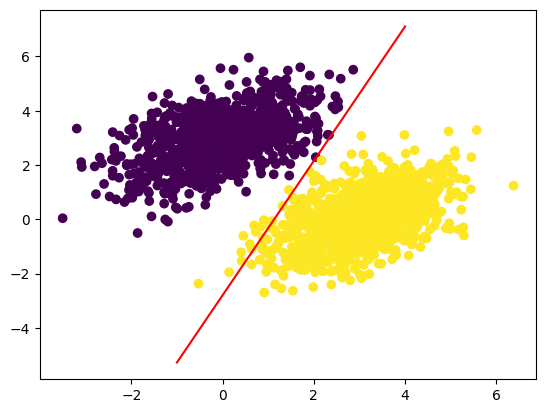

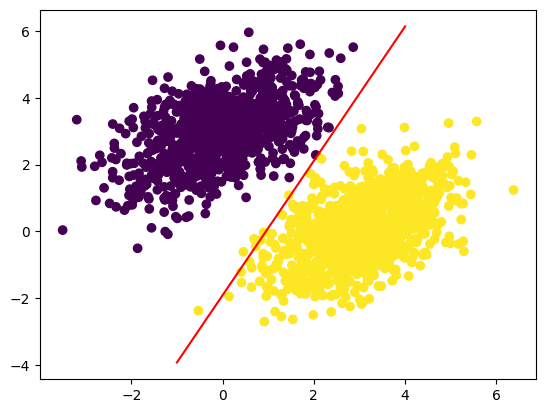

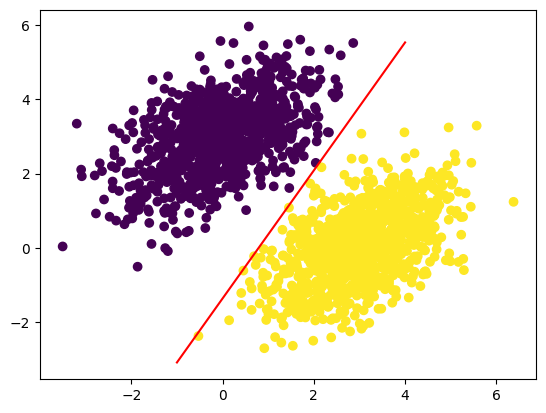

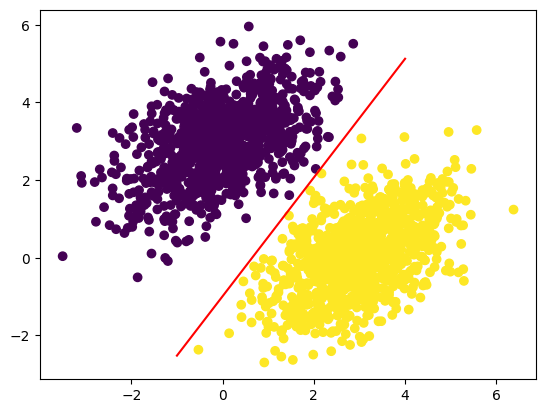

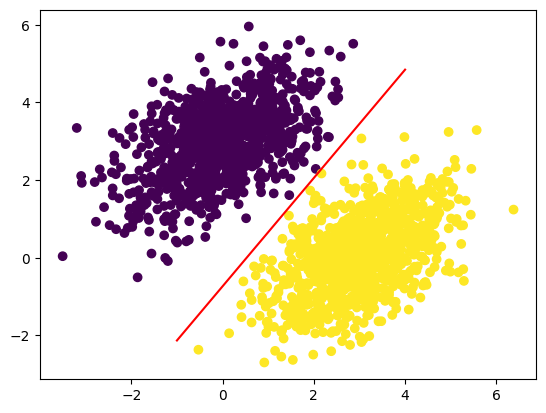

In [50]:
plt.subplots(2, 4, figsize=(12, 6))
plot_index = 0
for step in range(40):
    loss= training_step(inputs, targets)
    if step%5==4:
        x = [-1, 4]
        y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
        plt.plot(x, y, "-r")
        plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
        plt.show()

**[과제2] AND 게이트를 경사하강법으로 8번 학습시키시오. 스텝마다 예측 산포도와 임계 직선을 2$\times$4 모아찍기로 차례대로 출력하시오.**

**[과제3] OR 게이트를 경사하강법으로 8번 학습시키시오. 스텝마다 예측 산포도와 임계 직선을 2$\times$4 모아찍기로 차례대로 출력하시오.**

**[과제4] 활성화 함수가 ReLU인 이층 신경망이 dictionary
$$
\{W_1 : \begin{bmatrix} 0&0&0&0&1 \\ 1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{bmatrix},~
b_1 : [0,0,0,0,0],~
W_2 : \begin{bmatrix} 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ -5&5&5&5&-5 \end{bmatrix},~
b_2 : [0,0,0,0,0]
\}
$$
로 주어져 있습니다.**

**(i) 위 신경망과 동일한 구조를 가지는 신경망을 Sequential API로 구성하시오. (가중치와 편향은 디폴트 초기값을 사용)**

In [ ]:
from tensorflow import keras
from keras import layers, Sequential



**(ii) 가중치와 편향을 출력하시오.**

**(iii) 가중치를 위 신경망의 값으로 교체한 후 가중치를 출력하시오.**

**입력된 데이터는 $[1,2,3,4,5]$이라 하겠습니다.  
데이터 $x_1=[1,2,3,4,5]$이 첫번째 Affine층을 통과하면
$$
x_1 W_1 +b_1=
\begin{pmatrix}1&2&3&4&5\end{pmatrix}
\begin{pmatrix} 0&0&0&0&1 \\ 1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{pmatrix} =
\begin{pmatrix}2&-3&-4&-5&1\end{pmatrix}
$$
이 됩니다.
ReLu층은 음수를 죽여서
$$
x_2 = [2,0,0,0,1]
$$
로 만듭니다.
여기서 죽는 위치는 나중에 역전파에서 사용됩니다.
두번째 Affine층을 통과시키면 스코어
$$
s=x_2 W_2 +b_2=
\begin{pmatrix}2&0&0&0&1\end{pmatrix}
\begin{pmatrix}5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ -5&5&5&5&-5\end{pmatrix} =
\begin{pmatrix}5&5&5&5&5\end{pmatrix}
$$
를 얻습니다.
소프트맥스 변환을 하면 확률분포
$$
y = [{1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}]
$$
를 얻습니다.**

**(iv) 8-9번 문제에서 구성한 신경망을 이용해 위에서 손으로 계산한 최종 확률분포가 맞는지 검산하시오.**

**다음은 역전파를 진행하겠습니다.
순서는 순전파와 정반대 순으로 진행합니다.
마지막층부터 시작합니다.
라벨은 $[1,0,0,0,0]$이라 하겠습니다.  
SoftmaxWithLoss층의 역전파 공식은 신경망이 예측한 확률 벡터 빼기 라벨을 원핫인코딩한 확률벡터이므로 SoftmaxWithLoss층은 미분
$$
{\partial L \over \partial s} = y - t = [{1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}] - [1,0,0,0,0] =  [-{4 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}]
$$
을 밑으로 흘려보냅니다.
이것을 두번째 Affine층이 받습니다.
계산 그래프를 통해 미분
$$
\begin{aligned}
{\partial L \over \partial b_2} &= {\partial L \over \partial s} =  [-{4 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}] \\
{\partial L \over \partial W_2} &= x_2^T {\partial L \over \partial s} =
\begin{pmatrix}2 \\ 0 \\ 0 \\ 0 \\ 1\end{pmatrix}
\begin{pmatrix} -{4 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5} \end{pmatrix} =
\begin{pmatrix}-{8 \over 5}&{2 \over 5}&{2 \over 5}&{2 \over 5}&{2 \over 5} \\ 0&0&0&0&0 \\ 0&0&0&0&0 \\ 0&0&0&0&0 \\  -{4 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5} \end{pmatrix} \\
{\partial L \over \partial x_2} &= {\partial L \over \partial s} W_2^T =
\begin{pmatrix} -{4 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5} \end{pmatrix}
\begin{pmatrix} 5&5&5&5&-5 \\ 0&0&0&0&5 \\ 0&0&0&0&5 \\ 0&0&0&0&5 \\ 5&5&5&5&-5 \end{pmatrix} =
\begin{pmatrix} -3&-3&-3&-3&6 \end{pmatrix}
\end{aligned}
$$
을 계산합니다.
${\partial L \over \partial b_2}$와 ${\partial L \over \partial W_2}$는 두번째 Affine층 학습을 위해 사용되고 ${\partial L \over \partial x_2}$는 아래층으로 흘러갑니다.**

**이것을 ReLu층이 받습니다.
ReLu층은 학습해야할 파라미터가 없으므로 밑으로 흘려보낼 미분만 구하면 됩니다.
윗층에서 흘러들어온 미분에서 순전파에서 죽였던 자리를 죽이면  밑으로 흘려보낼 미분
$$
[-3,0,0,0,6]
$$
을 구할수 있습니다.**

**이것을 첫번째 Affine층에서 받습니다.
역시 계산그래프로 미분
$$
\begin{aligned}
{\partial L \over \partial b_1} &= [-3,0,0,0,6] \\
{\partial L \over \partial W_1} &= \begin{pmatrix}1\\2\\3\\4\\5\end{pmatrix}
\begin{pmatrix} -3&0&0&0&6 \end{pmatrix} =
\begin{pmatrix} -3&0&0&0&6 \\  -6&0&0&0&12 \\ -9&0&0&0&18 \\ -12&0&0&0&24 \\ -15&0&0&0&30 \end{pmatrix}
\end{aligned}
$$
을 구합니다.
아래층이 없기 때문에 ${\partial L \over \partial x_1}$는 굳이 구할 필요가 없겠죠.**

**학습률을 1로 잡습니다.  
경사하강법으로 파라미터들을
$$
\begin{aligned}
W_1- \eta {\partial L \over \partial W_1} &= \begin{pmatrix} 0&0&0&0&1 \\ 1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{pmatrix}
- \begin{pmatrix}  -3&0&0&0&6 \\  -6&0&0&0&12 \\ -9&0&0&0&18 \\ -12&0&0&0&24 \\ -15&0&0&0&30 \end{pmatrix} =
\begin{pmatrix}  3&0&0&0&-5 \\  7&0&0&0&-12 \\ 9&-1&0&0&-18 \\ 12&0&-1&0&-24 \\ 15&0&0&-1&-30 \end{pmatrix} \\
b_1-{\partial L \over \partial b_1} &= (0,0,0,0,0) - (-3,0,0,0,6) = (3,0,0,0,-6) \\
W_2- \eta {\partial L \over \partial W_2} &= \begin{pmatrix} 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ -5&5&5&5&-5 \end{pmatrix}
- \begin{pmatrix}-{8 \over 5}&{2 \over 5}&{2 \over 5}&{2 \over 5}&{2 \over 5} \\ 0&0&0&0&0 \\ 0&0&0&0&0 \\ 0&0&0&0&0 \\  -{4 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5} \end{pmatrix} =
\begin{pmatrix} {33 \over 5}&-{2 \over 5}&-{2 \over 5}&-{2 \over 5}&{23 \over 5} \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\  -{21 \over 5}& {24 \over 5}& {24 \over 5}& {24 \over 5}& -{26 \over 5} \end{pmatrix} \\
b_2-{\partial L \over \partial b_2} &= (0,0) - (-{4 \over 5},{1 \over 5},{1 \over 5},{1 \over 5},{1 \over 5}) = ({4 \over 5},-{1 \over 5},-{1 \over 5},-{1 \over 5},-{1 \over 5})
\end{aligned}
$$
와 같이 업데이트합니다.**

**(v) 8-10번 문제에서 순전파한 신경망을 이용해 위에서 손으로 계산한 가중치와 편향이 맞게 업데이트가 됬는지 검산하시오.**